# Subroutine 1
Generate points based on the labels (taken as an input from the GUI)
structure of the point:
    (t0, vel, flag (1=hyperbolic, 0=linear), label)

In [1]:
## for general
import random
import numpy as np
## for plotting
import matplotlib.pylab as plt
%matplotlib inline

## for the machine-learning
from sklearn import svm
SVC = svm.SVC()

import pprint


Generate points based on the labels (taken as an input from the GUI)
structure of the point:
    (t0, vel, flag (1=hyperbolic, 0=linear), label)

In [2]:
def points_gen(nDA,nR,nCN):
    # The function generates random values of t0 - velocity pairs
    # based on number of requested waves:
    # nDA - number of direct waves (linear moveout, label 'D')
    # nR - number of reflections (hyperbolic moveout, label 'R')
    # nCN - number of coherent noise events (linear moveout, label 'N')
    # outputs (nDA+nR+nCN) * (4) list
    # each point in the list has the following structure
    # [t0 (intercept time), velocity, flag(1=hyperbolic, 0=linear), label(see above))]
    
    
    # direct arrival
    direct = []
    n = 1
    while (n <= nDA):
        direct.append([0,random.uniform(.5,1.5),0,'D'])
        n = n+1
    
    n = 1
    reflected = []
    while (n <= nR):
        reflected.append([random.uniform(0,4),random.uniform(1.5,5),1,'R'])
        n = n+1
        
    n = 1
    noise = []
    while (n <= nCN):
        noise.append([random.uniform(-2,2),random.uniform(-3,3),0,'N'])
        n = n+1
        
    events = direct + reflected + noise
    return events

#### The main function that creates points object

In [3]:
def points_plot(events):
    x = [x/1000 for x in range(0,2000,25)]
    
    fig, ax = plt.subplots()
    
    # plot waves
    for i in events:
        if i[3] == 'D':
            y = [offset/i[1] for offset in x]
            ax.plot(x,y,'r')
        if i[3] == 'N':
            ax.plot(x,[i[0]+offset/i[1] for offset in x],'b')
        if i[3] == 'R':
            ax.plot(x,[np.sqrt(i[0]**2 + offset**2 / i[1]**2) for offset in x],'g')
    
    plt.ylabel('Time, s')
    plt.xlabel('Offset, km')
    ax.set_xlim([0,2])
    ax.set_ylim([0,4])
    ax.invert_yaxis()
    ax.set_aspect(1)
    return ax

#### Running the points generating function and generating a plot

this is for the events object

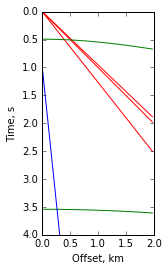

In [4]:
events=points_gen(3,2,3)
ax = points_plot(events)
plt.show(ax)

This creates the events2 object, same thing but different number of events

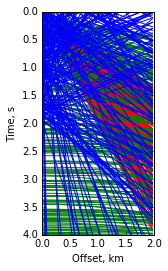

In [5]:
events2=points_gen(300,200,300)
ax2 = points_plot(events2)
plt.show(ax2)

This is what the events2 looks like, a list of lists with 4 items.
Eventually, we'll turn the list into a dictionary with three descriptors of each line: eventsDict['direct'], eventsDict['reflected'], eventsDict['coherentnoise'] and a label. 

In [6]:
events2

[[0, 0.5946013987735724, 0, 'D'],
 [0, 1.1479612433239086, 0, 'D'],
 [0, 1.1655180327064605, 0, 'D'],
 [0, 0.9742941847681368, 0, 'D'],
 [0, 1.1370129230609587, 0, 'D'],
 [0, 1.2642845765796573, 0, 'D'],
 [0, 1.0628965128729555, 0, 'D'],
 [0, 1.479801394198512, 0, 'D'],
 [0, 0.5228973961312633, 0, 'D'],
 [0, 0.6408221931914952, 0, 'D'],
 [0, 0.9807384243946878, 0, 'D'],
 [0, 1.4653971792320397, 0, 'D'],
 [0, 0.9792657903639392, 0, 'D'],
 [0, 1.48338856821014, 0, 'D'],
 [0, 1.2411617291277226, 0, 'D'],
 [0, 0.8548216708777754, 0, 'D'],
 [0, 1.2505537468589913, 0, 'D'],
 [0, 1.4392121162946099, 0, 'D'],
 [0, 0.8853265740963971, 0, 'D'],
 [0, 1.2037536942109281, 0, 'D'],
 [0, 1.0614329466744037, 0, 'D'],
 [0, 1.3102674575184539, 0, 'D'],
 [0, 1.4098384231398517, 0, 'D'],
 [0, 1.30670696663242, 0, 'D'],
 [0, 1.0888375257286365, 0, 'D'],
 [0, 0.9904983365218759, 0, 'D'],
 [0, 1.2382040605394504, 0, 'D'],
 [0, 1.0570353197059075, 0, 'D'],
 [0, 1.1047709853457448, 0, 'D'],
 [0, 1.197147893600

The same for events

In [7]:
events

[[0, 0.9974750585166021, 0, 'D'],
 [0, 0.7891278447600211, 0, 'D'],
 [0, 1.0480535149638217, 0, 'D'],
 [3.5425533459283494, 2.8642007328524173, 1, 'R'],
 [0.49469007822813316, 4.350026950303997, 1, 'R'],
 [-1.3658549061880612, -0.4382742629947005, 0, 'N'],
 [0.987040512208742, 0.1040585143771331, 0, 'N'],
 [-0.3066267834895169, -0.09632704397399561, 0, 'N']]

In [8]:
events[0]

[0, 0.9974750585166021, 0, 'D']

In [9]:
events[0][0]

0

#### It is easier to work with dictionaries than lists of lists, however, so we're going to change the data structure

In [10]:
#### A function that turns the events object lists of lists into a python dictionary
def makeEventsDict(events):
    eventsDict = {}
    labelsDict = {}
    # direct arrival
    labelsDict['label'] = []
    eventsDict['direct'], eventsDict['reflected'], eventsDict['coherentnoise'] = [],[],[]
    eventsDict['events'] = []
    for each in events:
         eventsDict['events'].append(each[0:3])
         labelsDict['label'].append(each[3])
    return(eventsDict,labelsDict)




this is the new dictionary

In [11]:
testEvents = makeEventsDict(events)
print(testEvents)

({'direct': [], 'coherentnoise': [], 'reflected': [], 'events': [[0, 0.9974750585166021, 0], [0, 0.7891278447600211, 0], [0, 1.0480535149638217, 0], [3.5425533459283494, 2.8642007328524173, 1], [0.49469007822813316, 4.350026950303997, 1], [-1.3658549061880612, -0.4382742629947005, 0], [0.987040512208742, 0.1040585143771331, 0], [-0.3066267834895169, -0.09632704397399561, 0]]}, {'label': ['D', 'D', 'D', 'R', 'R', 'N', 'N', 'N']})


In [12]:
eventsDict = testEvents[0]
labelsDict = testEvents[1]

In [13]:

X = eventsDict['events']
print("X = ",X)
y = labelsDict['label']
print("y = ",y)
clf = svm.SVC()
clf.fit(X, y) 

X =  [[0, 0.9974750585166021, 0], [0, 0.7891278447600211, 0], [0, 1.0480535149638217, 0], [3.5425533459283494, 2.8642007328524173, 1], [0.49469007822813316, 4.350026950303997, 1], [-1.3658549061880612, -0.4382742629947005, 0], [0.987040512208742, 0.1040585143771331, 0], [-0.3066267834895169, -0.09632704397399561, 0]]
y =  ['D', 'D', 'D', 'R', 'R', 'N', 'N', 'N']


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
clf.predict([[0,1.34,0]])

array(['D'], 
      dtype='<U1')

#### SUCCESS !! really really easy success, but at least it didn't do anything obviously wrong!

In [15]:
# get support vectors
clf.support_vectors_

array([[ 0.        ,  0.99747506,  0.        ],
       [ 0.        ,  0.78912784,  0.        ],
       [ 0.        ,  1.04805351,  0.        ],
       [-1.36585491, -0.43827426,  0.        ],
       [ 0.98704051,  0.10405851,  0.        ],
       [-0.30662678, -0.09632704,  0.        ],
       [ 3.54255335,  2.86420073,  1.        ],
       [ 0.49469008,  4.35002695,  1.        ]])

In [16]:
# get indices of support vectors
clf.support_ 

array([0, 1, 2, 5, 6, 7, 3, 4], dtype=int32)

In [17]:
# get number of support vectors for each class
clf.n_support_ 

array([3, 3, 2], dtype=int32)

#### function that creates model from events dictionary with labels

In [18]:
# This function combines several of the smaller lines above
# It takes a events list, turns it into two dictionaries combined, splits that into two arrays for X and Y
# trains a SVM label on them and then returns that model output details
# The model will need to be run on a input for a prediction

def comboFunctionA(events):
    testEvents = makeEventsDict(events)
    eventsDict = testEvents[0]
    labelsDict = testEvents[1]
    X = eventsDict['events']
#     print("X = ",X)
    y = labelsDict['label']
#     print("y = ",y)
    clf = svm.SVC()
    output = clf.fit(X, y)
    return(output)
    

#### function that creates a dictionary of several items that examines model created

In [19]:
def examineModel(model):
    model_examine = {}
    model_examine['support_vectors_']= model.support_vectors_
    model_examine['support_']= model.support_
    model_examine['n_support_']= model.n_support_
    model_examine['model']= model
#     'support_':model.support_,'n_support_':model.n_support_}
    return(model_examine)

testing comboFunctionA that makes models on events dictionary

In [20]:
events_1_model = comboFunctionA(events)
events_1_model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

testing examineModel on model that resulted from comboFunctionA(events)

In [21]:
examineModel(events_1_model)

{'model': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'n_support_': array([3, 3, 2], dtype=int32),
 'support_': array([0, 1, 2, 5, 6, 7, 3, 4], dtype=int32),
 'support_vectors_': array([[ 0.        ,  0.99747506,  0.        ],
        [ 0.        ,  0.78912784,  0.        ],
        [ 0.        ,  1.04805351,  0.        ],
        [-1.36585491, -0.43827426,  0.        ],
        [ 0.98704051,  0.10405851,  0.        ],
        [-0.30662678, -0.09632704,  0.        ],
        [ 3.54255335,  2.86420073,  1.        ],
        [ 0.49469008,  4.35002695,  1.        ]])}

##### Running the comboFunctionA() function on events2 to make another model

In [22]:
# runs the function above and gets a model
events2Model = comboFunctionA(events2)
# examines model
examineModelEvent2 = examineModel(events2Model)
# calling only the model of the examine dictionary
onlyModelEvents2 = examineModelEvent2['model']
# printing it
onlyModelEvents2

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Test predict of the first small events dictionary

In [23]:
#### Based on the known inputs used for traning, it should predict D and D for these points
events_1_model.predict([[0,1.34,0],[0,1.4,0.2]])

array(['D', 'D'], 
      dtype='<U1')

The prediction above was correct

### Moving on to testing model on events it hasn't seen yet

A function that takes a model and an eventsDictionary and make predictions of labels for the eventsDictionary based on a trained model

In [24]:
# A function that takes a model and an eventsDictionary and make predictions of labels for the eventsDictionary based on a trained model
def testUnseenEvents(model,eventsDict):
    score = {}
    score['result'] = []
    score['test'] = []
    score['isCorrect'] = []
    x = 0
#     eventsTest_eventsDict = eventsDict[0]['events']
#     eventsTest_labelsDict = eventsDict[1]['label']
    i = 0
    while i < len(eventsDict[0]['events']):
        each = i
#         print("each",each)
        eventsTest_eventsDict = eventsDict[0]['events']
        eventsTest_labelsDict = eventsDict[1]['label']
#         print("eventsTest_eventsDict",eventsTest_eventsDict)
#         print("eventsTest_labelsDict",eventsTest_labelsDict)
#         print("eventsTest_eventsDict[i]",eventsTest_eventsDict[i])
#         print("eventsTest_labelsDict[i]",eventsTest_labelsDict[i])
        prediction = model.predict(eventsTest_eventsDict[i])
        if prediction == eventsDict[1]['label'][i]:
            isCorrect = "True"
        else:
            isCorrect = "False"
        score['result'].append(prediction)
        score['test'].append(each)
        score['isCorrect'].append(isCorrect)
        i += 1
    return(score)  

#### Making another events dictionary. This one has the same shape as events2, but we won't use it for training. We'll use events2 for training and test it against events2

In [25]:
# generating events3 list of lists
events3=points_gen(300,200,300)

In [26]:
# convert events3 to dictionary
events3_testEvents = makeEventsDict(events3)
# split eventsDict from labels
events3_eventsDict = testEvents[0]
events3_labelsDict = testEvents[1]

In [27]:
#### running the test of events3 against model trained on events2
answer = testUnseenEvents(events2Model,events3_testEvents)
### not showing as rather long
#answer

/Users/justingosses/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/justingosses/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/justingosses/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it c

An attempt at pretty print function for this testAnswer dictionary

In [28]:
def printTable(myDict, colList=None):
   """ Pretty print a list of dictionaries (myDict) as a dynamically sized table.
   If column names (colList) aren't specified, they will show in random order.
   Author: Thierry Husson - Use it as you want but don't blame me.
   """
   if not colList: colList = list(myDict[0].keys() if myDict else [])
   myList = [colList] # 1st row = header
   for item in myDict: myList.append([str(item[col] or '') for col in colList])
   colSize = [max(map(len,col)) for col in zip(*myList)]
   formatStr = ' | '.join(["{{:<{}}}".format(i) for i in colSize])
   myList.insert(1, ['-' * i for i in colSize]) # Seperating line
   for item in myList: print(formatStr.format(*item))

#### A nicer to look at summary of how many of the labels were predicted successfully

In [29]:
def getTrueFalseOfPred(predictionDict):
    numberTrueFalse = {'True':0,'False':0,'PerTrue':0,'PerFalse':0,'Total':0}
    numberTrueFalse['Total'] = len(predictionDict['isCorrect'])
    i = 0
    while i < len(predictionDict['isCorrect']):
        if predictionDict['isCorrect'][i]:
            numberTrueFalse['True'] = numberTrueFalse['True'] + 1
        else:
            numberTrueFalse['False'] = numberTrueFalse['False'] + 1 
        i = i + 1
    numberTrueFalse['PerTrue'] = numberTrueFalse['True'] / numberTrueFalse['Total']
    numberTrueFalse['PerFalse'] = numberTrueFalse['False'] / numberTrueFalse['Total']
    return(numberTrueFalse)
    

#### Results for prediction of events3 based on model of events2

In [30]:
getTrueFalseOfPred(answer)

{'False': 0, 'PerFalse': 0.0, 'PerTrue': 1.0, 'Total': 800, 'True': 800}